[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/055_pytorch_torchvision/torchvision.ipynb)

# Torchvision

En posts anteriores hemos visto diferentes aspectos de la librería de redes neuronales `Pytorch`. Sin embargo, existen otras herramientas dentro del mismo ecosistema que utilizan las características fundamentales de `Pytorch` para construir por encima soluciones enfocadas a campos de aplicación concretos. Entre estas librerías podemos encontrar [torchvision](https://pytorch.org/docs/stable/torchvision/index.html), para aplicaciones de visión artificial, [torchtext](https://pytorch.org/text/), para aplicaciones de procesamiento de lenguaje, [torchaudio](https://pytorch.org/audio/stable/index.html), para aplicaciones en las que procesemos sonido, y muchas otras. Estas librerías contienen modelos, datasets y otras operaciones comunes para cada aplicación. De hecho, ya hemos utilizado algunas de estas librerías en posts anteriores. En este post veremos en detalle los aspectos más interesantes de la librería `torchvision`.

In [1]:
import torch 
import torchvision

## Datasets

El primer recurso que podemos aprovechar de la librería `torchvision` es su amplio abanico de conjuntos de datos, listos para ser utilizados. Entre estos *datasets* encontramos algunos tan comunes como `MNIST`, `CIFAR10` o `Imagenet` para [clasificación](https://sensioai.com/blog/045_cv_tareas) de imágenes, pero también tenemos *datasets* para otras tareas, como la [detección de objetos](https://sensioai.com/blog/048_cv_detection) o la [segmentación semántica](https://sensioai.com/blog/050_cv_segmentacion).

> ⚡ Encuentra la lista completa de datasets [aquí](https://pytorch.org/docs/stable/torchvision/datasets.html)

Veamos un ejemplo de cómo descargar el dataset `CIFAR10`.

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


Como puedes ver, las imágenes se descargarán automáticamente con la opción `download=True`. También puedes descargar conjuntos de entrenamiento o de test con la opción `train`.

In [3]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

Files already downloaded and verified


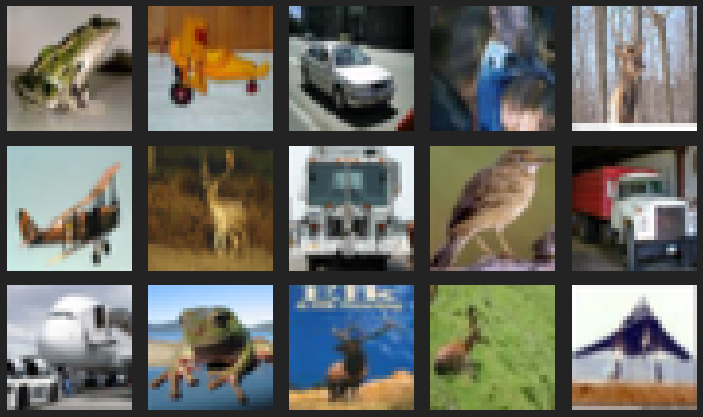

In [10]:
import random
import matplotlib.pyplot as plt

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(trainset))
        img, label = trainset[ix]
        plt.axis("off")
        plt.imshow(img)
plt.tight_layout()
plt.show()

De esta forma tan sencilla puedes descargar cualquier otro de los datasets en `torchvision`, los cuales puedes utilizar como cualquier otro objeto de tipo `Dataset` de `Pytorch` como los que utilizamos en otros posts.

## Transformaciones

Una de las técnicas de regularización más utilizadas a la hora de entrenar redes neuronales para tareas de visión artificial es el *data augmentation*. `Torchvision` nos ofrece un gran conjunto de [transformaciones](https://pytorch.org/docs/stable/torchvision/transforms.html) que podemos utilizar de la siguiente manera.

In [13]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

Files already downloaded and verified


Puedes concatenar transformaciones pasando una lista de transformaciones a la clase `Compose`, la cual aplicará una transformación tras otra. En este caso, convertimos la imagen a un tensor de tipo `float` con valores entre 0 y 1 y moviendo la dimensión de los canales al principio (requisito para entrenar redes convolucionales). Después, la normalizamos con una valor medio de 0.5 y una desviación típica de 0.5, obteniendo tensores entre -1 y 1. De esta manera, nuestro dataset ya está listo para alimentar una red convolucional. 

In [23]:
img, label = trainset[0]
img.dtype, img.shape, img.max(), img.min()

(torch.float32, torch.Size([3, 32, 32]), tensor(1.), tensor(-1.))

De la misma manera, podemos asignar transformaciones aleatorias que nos darán una versión diferente de una misma imagen cada vez que se la pidamos al dataset.

In [62]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop((28,28)),      
        torchvision.transforms.Resize((32,32)),      
        torchvision.transforms.RandomHorizontalFlip(),
        # ...
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

Files already downloaded and verified


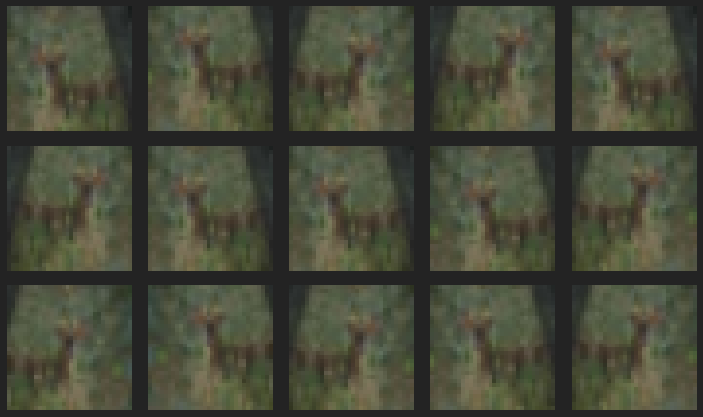

In [63]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = 10
        img, label = trainset[ix]
        plt.axis("off")
        # desnormalizar
        img = img*0.5 + 0.5 
        img = img.permute(1, 2, 0)
        plt.imshow(img)
plt.tight_layout()
plt.show()

## Modelos

Una de las características más interesantes de la librería `torchvision` es el gran listado de modelos que nos ofrece. Estos modelos contienen implementaciones de redes convolucionales populares tales como `Resnet`, `Mobilenet`, `VGG`... Todas listas para ser utilizadas y con la posibilidad de descargar sus pesos pre-entrenados en el dataset *Imagenet* para hacer [transfer learning](https://sensioai.com/blog/044_cnn_transfer_learning).

> ⚡ Puedes encontrar un listado de los modelos disponibles [aquí](https://pytorch.org/docs/stable/torchvision/models.html)

Vamos a ver un ejemplo de cómo descargar una red neuronal utilizando `torchvision`.

In [64]:
resnet = torchvision.models.resnet18()

Una vez descargada la red, podemos inspeccionar todas sus capas.

In [65]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Para descargar la red pre-entrenada, es tan sencillo como

In [66]:
resnet = torchvision.models.resnet18(pretrained=True)

Una práctica muy común a la hora de entrenar redes convolucionales es descargar un modelo ya entrenado y modificarlo para ajustarlo a nuestra tarea en particular. Por ejemplo, si queremos utilizar la red `resnet18` para clasificar imágenes del dataset `CIFAR10` obtendremos resultados no deseados ya que la red original fue entrenada para 1000 clases, mientras que `CIFAR10` solo tiene 10. 

Para adaptar la red, podemos simplemente sustituir la última capa de la siguiente manera.

In [67]:
num_classes = 10
resnet.fc = torch.nn.Linear(resnet.fc.in_features, num_classes)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [71]:
img, label = trainset[ix]
# simulamos un batch de 3 imágenes
batch = torch.stack([img, img, img])
y = resnet(batch)
y.shape

torch.Size([3, 10])

De la misma manera, podemos descargar cualquier modelo disponible y adaptarlo para nuestro caso o utilizarlo como componente en un sistema más complejo.

## Operaciones

Por último, `torchvision` nos ofrece algunas [operaciones](https://pytorch.org/docs/stable/torchvision/ops.html) comunes en aplicaciones de visión artificial. Algunos ejemplos, que ya hemos usado en [posts](https://sensioai.com/blog/049_cv_ssd) anteriores, son: calcular la métrica `IoU`, el algoritmo de `NMS`, componentes que encontramos en algunas arquitecturas como `RoIAlign` o `FeaturePyramidNetwork`, entre otros.

En el siguiente ejemplo definimos dos conjuntos de cajas y calculamos el `IoU` de todas las combinaciones.

In [78]:
# x_min, y_min, x_max, y_max
box1 = torch.tensor([[0, 0, 1, 1], [0, 0, 0.5, 0.5]])
box2 = torch.tensor([[0, 0, 1, 1], [0.5, 0.5, 1, 1]])
torchvision.ops.box_iou(box1, box2)

tensor([[1.0000, 0.2500],
        [0.2500, 0.0000]])

## Resumen

En este post hemos visto las diferentes posibilidades que nos ofrece la librería `torchvision` a la hora de llevar a cabo tareas de visión artificial. Construyendo sobre la funcionalidad básica de `Pytorch`, esta librería nos ofrece *datasets* comunes, modelos pre-entrenados, transformaciones y operaciones útiles a la hora de entrenar redes convolucionales para tareas de visión por computador.